# Importing Required Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC # For SVM model
from sklearn.tree import DecisionTreeClassifier # For Decission Tree Classifier
from sklearn import tree
from ipywidgets import interact,interactive
from sklearn.ensemble import RandomForestClassifier # For random Forest Classifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression # For Logistic Regression
from xgboost import XGBClassifier,plot_importance # For XGBoost Classifier
from catboost import CatBoostClassifier # For Cat Boost Classifier
from imblearn.over_sampling import SMOTE
from keras.models import Sequential # For Neural Network Sequential Model
from keras.layers import Dense, Activation,Layer,Lambda
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


# Data Preprocessing Before Modelling

       AC_1001_Issue  AC_1002_Issue  AC_1003_Issue  TV_2001_Issue  \
count    8341.000000    8341.000000    8341.000000    8341.000000   
mean        0.268913       0.300563       0.190025       0.354274   
std         0.572955       0.587182       0.500576       0.587451   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         2.000000       2.000000       2.000000       2.000000   

       TV_2002_Issue  TV_2003_Issue   Claim_Value  Service_Centre  \
count    8341.000000    8341.000000   8101.000000     8341.000000   
mean        0.433042       0.296247  14051.151586       12.832154   
std         0.639980       0.546295  13200.318156        1.724802   
min         0.000000       0.000000      0.000000       10.000000   
25%         0.000000       0.0000

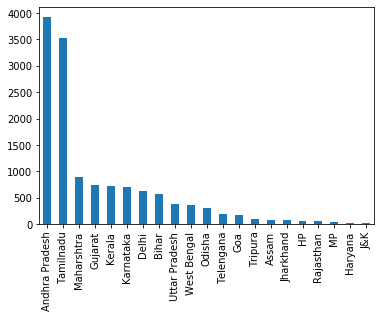

In [2]:
#LOADING DATASET

data=pd.read_csv("train.csv")

data.head()

#Dropping first column

data1=data.drop(['Unnamed: 0'],axis=1)

print(data1.describe())

#Replace claim with Claim

data1['Purpose'].replace('claim','Claim',inplace=True)

data1['Purpose'].value_counts()

data1['Purpose'].value_counts().plot(kind='bar')

#Replace up with uttar pradesh

data1['State'].replace('UP','Uttar Pradesh',inplace=True)

data1['State'].value_counts()

data1['State'].value_counts().plot(kind='bar')

#Finding the duplicate values

data1.describe()

data1.Claim_Value.duplicated()

data1.Claim_Value.duplicated().sum()

data1.duplicated()

data1.duplicated().sum()

data1.loc[data1.duplicated(),:]

data1.loc[data1.duplicated(keep='first'),:]

data1.loc[data1.duplicated(keep='last'),:]

data1.loc[data1.duplicated(keep=False),:]

data1=data1.drop_duplicates()

data1

#NA Values

data1.isnull()

data1.isnull().sum()

data1.Claim_Value.describe()

#Null value drop

data2 = data1.dropna(axis=0,how='any')

data2.Claim_Value.describe()

data2.isnull().sum()

data2.info()

# Cleansed data

df = data2

In [3]:
[f"{i} is {df[i].dtype}" for i in df.columns]

['Region is object',
 'State is object',
 'Area is object',
 'City is object',
 'Consumer_profile is object',
 'Product_category is object',
 'Product_type is object',
 'AC_1001_Issue is int64',
 'AC_1002_Issue is int64',
 'AC_1003_Issue is int64',
 'TV_2001_Issue is int64',
 'TV_2002_Issue is int64',
 'TV_2003_Issue is int64',
 'Claim_Value is float64',
 'Service_Centre is int64',
 'Product_Age is int64',
 'Purchased_from is object',
 'Call_details is float64',
 'Purpose is object',
 'Fraud is int64']

## Categorical Data (df_cat)

In [4]:
df_cat = pd.DataFrame.copy(df)
columns = ['Product_Age','Call_details','Claim_Value']
for i in df_cat.columns:
    if i not in columns:
        df_cat[i] = df_cat[i].astype('category')
[f"{i} is {df_cat[i].dtype}" for i in df_cat.columns]

['Region is category',
 'State is category',
 'Area is category',
 'City is category',
 'Consumer_profile is category',
 'Product_category is category',
 'Product_type is category',
 'AC_1001_Issue is category',
 'AC_1002_Issue is category',
 'AC_1003_Issue is category',
 'TV_2001_Issue is category',
 'TV_2002_Issue is category',
 'TV_2003_Issue is category',
 'Claim_Value is float64',
 'Service_Centre is category',
 'Product_Age is int64',
 'Purchased_from is category',
 'Call_details is float64',
 'Purpose is category',
 'Fraud is category']

## Label Encoded data (df_Lable)

In [5]:
df_Label = pd.DataFrame.copy(df_cat)
for i in df_Label.columns:
    if df_Label[i].dtype.name =='category':
        enco = preprocessing.LabelEncoder()
        enco.fit(list(set(df_Label[i])))
        df_Label[i] = enco.transform(df_Label[i])

In [6]:
df_Label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 7367
Data columns (total 20 columns):
Region              347 non-null int32
State               347 non-null int32
Area                347 non-null int32
City                347 non-null int32
Consumer_profile    347 non-null int32
Product_category    347 non-null int32
Product_type        347 non-null int32
AC_1001_Issue       347 non-null int64
AC_1002_Issue       347 non-null int64
AC_1003_Issue       347 non-null int64
TV_2001_Issue       347 non-null int64
TV_2002_Issue       347 non-null int64
TV_2003_Issue       347 non-null int64
Claim_Value         347 non-null float64
Service_Centre      347 non-null int64
Product_Age         347 non-null int64
Purchased_from      347 non-null int32
Call_details        347 non-null float64
Purpose             347 non-null int32
Fraud               347 non-null int64
dtypes: float64(2), int32(9), int64(9)
memory usage: 44.7 KB


## Normalised Dummy Data (df_norm_dummy)

In [7]:
_df_norm = pd.DataFrame.copy(df_cat)
colum = []
for i in _df_norm.columns:
    if _df_norm[i].dtype.name == 'category':
        colum.append(i)
df_dummy = pd.get_dummies(_df_norm, columns =colum[:-1])
min_max_scaler = preprocessing.MinMaxScaler()
Scaled = min_max_scaler.fit_transform(df_dummy[['Product_Age','Call_details','Claim_Value']] )

In [8]:
col = list(df_dummy.columns)
_norm_dummy = np.concatenate((Scaled,df_dummy.values[:,3:99]),axis=1)
df_norm_dummy = pd.DataFrame(_norm_dummy,columns=col)
df_norm_dummy

,Claim_Value,Product_Age,Call_details,Fraud,Region_East,Region_North,Region_North East,Region_North West,Region_South,Region_South East,...,Service_Centre_13,Service_Centre_14,Service_Centre_15,Service_Centre_16,Purchased_from_Dealer,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Claim,Purpose_Complaint,Purpose_Other
0,0.201417,1,0.08948,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0.0576923,0.0271186,0.5,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0.0677966,0.2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.677126,0.830508,0.08432,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0.20339,0.4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.0161943,0.0644068,0.3,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
343,0.145749,0.389831,0.04,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
344,0.327935,0.254237,0.08792,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
345,0.303644,0.220339,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


# Balancing the data Before Modeling

## Balancing to Lable Data (X_lab_balance,Y_lab_balance)

In [9]:
sm_x_lab = pd.DataFrame.copy(df_Label)
sm_y_lab = sm_x_lab.pop('Fraud')
sm = SMOTE(random_state =101)
X_lab_balance, Y_lab_balance = sm.fit_sample(sm_x_lab, sm_y_lab)
X_lab_balance.shape, Y_lab_balance.shape

((624, 19), (624,))

## Balancing the Categorical Data (X_cat_balance, Y_cat_balance)

In [10]:
df_majority = df_cat[df_cat.Fraud==0]
df_minority = df_cat[df_cat.Fraud==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=312,    # to match majority class
                                 random_state=101) # reproducible results
df_cat_balance = pd.concat([df_majority, df_minority_upsampled])
df_cat_balance.Fraud.value_counts()
X_cat_balance = pd.DataFrame.copy(df_cat_balance)
Y_cat_balance = X_cat_balance.pop('Fraud')
X_cat_balance.shape, Y_cat_balance.shape

((624, 19), (624,))

## Balancing The Normalised Dummy data

In [11]:
sm_x_nd = pd.DataFrame.copy(df_norm_dummy)
sm_y_nd = sm_x_nd.pop('Fraud')
sm = SMOTE(random_state =101)
X_nd_balance, Y_nd_balance = sm.fit_sample(sm_x_nd, sm_y_lab)
X_nd_balance.shape, Y_nd_balance.shape

((624, 98), (624,))

# Train Test Split

## For Categorical Data

In [12]:
# Balanced
X_train_cat_bal,X_test_cat_bal,Y_train_cat_bal,Y_test_cat_bal = train_test_split(X_cat_balance, Y_cat_balance,test_size=0.3,random_state=101)
X_train_cat_bal.shape,X_test_cat_bal.shape,Y_train_cat_bal.shape,Y_test_cat_bal.shape

((436, 19), (188, 19), (436,), (188,))

In [13]:
# Original
X_c = pd.DataFrame.copy(df_cat)
Y_c = X_c.pop('Fraud')
X_train_cat,X_test_cat,Y_train_cat,Y_test_cat = train_test_split(X_c,Y_c,test_size=0.3,random_state=101)
X_train_cat.shape,X_test_cat.shape,Y_train_cat.shape,Y_test_cat.shape

((242, 19), (105, 19), (242,), (105,))

## For Labeled Data

In [14]:
# Balanced
X_train_lab_bal,X_test_lab_bal,Y_train_lab_bal,Y_test_lab_bal = train_test_split(X_lab_balance, Y_lab_balance,test_size=0.3,random_state=101)
X_train_lab_bal.shape,X_test_lab_bal.shape,Y_train_lab_bal.shape,Y_test_lab_bal.shape

((436, 19), (188, 19), (436,), (188,))

In [15]:
# Original
X_l = pd.DataFrame.copy(df_Label)
Y_l = X_l.pop('Fraud')
X_train_lab,X_test_lab,Y_train_lab,Y_test_lab = train_test_split(X_l,Y_l,test_size=0.3,random_state=101)
X_train_lab.shape,X_test_lab.shape,Y_train_lab.shape,Y_test_lab.shape

((242, 19), (105, 19), (242,), (105,))

## For Normalised Dummy Data

In [16]:
# Balanced
X_train_nd_bal,X_test_nd_bal,Y_train_nd_bal,Y_test_nd_bal = train_test_split(X_nd_balance, Y_nd_balance,test_size=0.3,random_state=101)
X_train_nd_bal.shape,X_test_nd_bal.shape,Y_train_nd_bal.shape,Y_test_nd_bal.shape

((436, 98), (188, 98), (436,), (188,))

In [17]:
# Original
X_d = pd.DataFrame.copy(df_norm_dummy)
Y_d = X_d.pop('Fraud')
X_train_nd,X_test_nd,Y_train_nd,Y_test_nd = train_test_split(X_d,Y_d,test_size=0.3,random_state=101)
X_train_nd.shape,X_test_nd.shape,Y_train_nd.shape,Y_test_nd.shape

((242, 98), (105, 98), (242,), (105,))

<hr>    

# Model Fitting And Evaluation

<hr>

## A Simple Decission Tree (Using Labeled Data)

In [18]:
def treebuild(cri='entropy',mxd=10,minsl=2,rs=28,spl='best'):
    Warranty_Tree = DecisionTreeClassifier(criterion=cri,max_depth=mxd,min_samples_leaf=minsl,random_state=rs,splitter=spl)
    Warranty_Tree.fit(X_train_lab_bal,Y_train_lab_bal)
    pred_bal = Warranty_Tree.predict(X_test_lab_bal)
    pred_ = Warranty_Tree.predict(X_test_lab)
    prr_bal = Warranty_Tree.predict(X_train_lab_bal)
    prr_ = Warranty_Tree.predict(X_train_lab)
    print("Test Accuracy original Data",np.mean(Y_test_lab==pred_))
    print("Train Accuracy Original Data",np.mean(Y_train_lab==prr_))
    print ("Test Accuracy Balanced Data",np.mean(Y_test_lab_bal==pred_bal))
#     print(classification_report(Y_test_lab_bal,pred_bal))
    print("Train Accuracy Balanced Data",np.mean(Y_train_lab_bal==prr_bal))
    print(classification_report(Y_test_lab,pred_))
interact(treebuild,cri=['entropy','gini'],mxd=[i for i in range(1,20)],minsl=[i for i in range(1,10)],rs=[i for i in  range(30)],spl=['best','random'])

interactive(children=(Dropdown(description='cri', options=('entropy', 'gini'), value='entropy'), Dropdown(desc…

<function __main__.treebuild(cri='entropy', mxd=10, minsl=2, rs=28, spl='best')>

### Hypertuning the decission tree

cri=['entropy','gini']
mxd=[i for i in range(1,20)]
minsl=[i for i in range(1,10)]
rs=[i for i in  range(30)]
spl=['best','random']
Warranty_Tree = DecisionTreeClassifier()
parm_grid = dict(criterion=cri,max_depth=mxd,min_samples_leaf=minsl,random_state=rs,splitter=spl)
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=101)
gridsearch = GridSearchCV(Warranty_Tree,parm_grid,scoring="balanced_accuracy", n_jobs=4, cv=kfold)
grid_result = gridsearch.fit(X_lab_balance,Y_lab_balance);
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## Random Forest

In [19]:
def forests(n_est=20,cri='entropy',mxd=9,mslf=3,mf='auto',rs=9):
    forest = RandomForestClassifier(n_estimators=n_est,criterion=cri,max_depth=mxd,min_samples_leaf=mslf,max_features=mf,random_state=rs)
    forest.fit(X_train_lab_bal,Y_train_lab_bal)
    pred_bal = forest.predict(X_test_lab_bal)
    pred_ = forest.predict(X_test_lab)
    prr_bal = forest.predict(X_train_lab_bal)
    prr_ = forest.predict(X_train_lab)
    print("Test Accuracy original Data",np.mean(Y_test_lab==pred_))
    print(classification_report(Y_test_lab,pred_))
    print ("Test Accuracy Balanced Data",np.mean(Y_test_lab_bal==pred_bal))
    print(classification_report(Y_test_lab_bal,pred_bal))
    print("Train Accuracy Original Data",np.mean(Y_train_lab==prr_))
    print("Train Accuracy Balanced Data",np.mean(Y_train_lab_bal==prr_bal))
interact(forests,n_est=[i for i in range(10,100)],cri=['gini','entropy'],mxd=[i for i in range(1,10)],mslf=[i for i in range(1,10)],mf=['auto','sqrt','log2'],rs=[i for i in range(30)])

interactive(children=(Dropdown(description='n_est', index=10, options=(10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

<function __main__.forests(n_est=20, cri='entropy', mxd=9, mslf=3, mf='auto', rs=9)>

___So we are getting more than 90% Accuracy from this model (20,entropy,9,3,auto,9) combination

n_est=[50,100,200]
cri=['gini','entropy']
mxd=[i for i in range(1,10)]
mslf=[i for i in range(1,10)]
mf=['auto']
rs=[i for i in range(30)]
forest = RandomForestClassifier()
parm_grid = dict(n_estimators=n_est,criterion=cri,max_depth=mxd,min_samples_leaf=mslf,max_features=mf,random_state=rs)
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=101)
gridsearch = GridSearchCV(forest,parm_grid,scoring="balanced_accuracy", n_jobs=4, cv=kfold)
grid_result = gridsearch.fit(X_lab_balance,Y_lab_balance);
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.938080 using {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 50, 'random_state': 13}

## Using the XGB model

In [20]:
xgm = XGBClassifier(max_depth=5,learning_rate=0.2,n_estimators=200)
xgm.fit(X_train_lab_bal,Y_train_lab_bal)
pred_bal = xgm.predict(X_test_lab_bal)
pred_ = xgm.predict(X_test_lab)
prr_bal = xgm.predict(X_train_lab_bal)
prr_ = xgm.predict(X_train_lab)

print("Train Accuracy Original Data",np.mean(Y_train_lab==prr_))
print("Test Accuracy original Data",np.mean(Y_test_lab==pred_))
print(classification_report(Y_test_lab,pred_))
print("Train Accuracy Balanced Data",np.mean(Y_train_lab_bal==prr_bal))
print ("Test Accuracy Balanced Data",np.mean(Y_test_lab_bal==pred_bal))
print(classification_report(Y_test_lab_bal,pred_bal))



Train Accuracy Original Data 0.9421487603305785
Test Accuracy original Data 0.8952380952380953
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        95
           1       0.45      0.50      0.48        10

    accuracy                           0.90       105
   macro avg       0.70      0.72      0.71       105
weighted avg       0.90      0.90      0.90       105

Train Accuracy Balanced Data 0.981651376146789
Test Accuracy Balanced Data 0.898936170212766
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        96
           1       0.91      0.88      0.90        92

    accuracy                           0.90       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.90      0.90       188



## Using Cat Boost

In [21]:
modelcat = CatBoostClassifier(learning_rate=0.1,depth=3,n_estimators=400,cat_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,18])
modelcat.fit(X_train_cat_bal,Y_train_cat_bal)
pred_bal = modelcat.predict(X_test_cat_bal)
pred_ = modelcat.predict(X_test_cat)
prr_bal = modelcat.predict(X_train_cat_bal)
prr_ = modelcat.predict(X_train_cat)

0:	learn: 0.6713621	total: 70.2ms	remaining: 28s
1:	learn: 0.6561198	total: 72.6ms	remaining: 14.4s
2:	learn: 0.6227255	total: 78ms	remaining: 10.3s
3:	learn: 0.6005915	total: 84ms	remaining: 8.32s
4:	learn: 0.5724060	total: 99ms	remaining: 7.82s
5:	learn: 0.5414116	total: 107ms	remaining: 7s
6:	learn: 0.5120578	total: 111ms	remaining: 6.25s
7:	learn: 0.5002554	total: 117ms	remaining: 5.74s
8:	learn: 0.4957267	total: 130ms	remaining: 5.66s
9:	learn: 0.4808794	total: 141ms	remaining: 5.48s
10:	learn: 0.4656065	total: 150ms	remaining: 5.32s
11:	learn: 0.4501408	total: 159ms	remaining: 5.13s
12:	learn: 0.4401582	total: 169ms	remaining: 5.02s
13:	learn: 0.4250029	total: 176ms	remaining: 4.84s
14:	learn: 0.4161754	total: 186ms	remaining: 4.78s
15:	learn: 0.4102709	total: 193ms	remaining: 4.63s
16:	learn: 0.4048705	total: 205ms	remaining: 4.63s
17:	learn: 0.3985884	total: 217ms	remaining: 4.61s
18:	learn: 0.3950649	total: 219ms	remaining: 4.39s
19:	learn: 0.3869413	total: 229ms	remaining: 4.

165:	learn: 0.1699066	total: 1.68s	remaining: 2.37s
166:	learn: 0.1691413	total: 1.7s	remaining: 2.36s
167:	learn: 0.1688937	total: 1.7s	remaining: 2.35s
168:	learn: 0.1685423	total: 1.71s	remaining: 2.33s
169:	learn: 0.1682352	total: 1.72s	remaining: 2.32s
170:	learn: 0.1673935	total: 1.73s	remaining: 2.31s
171:	learn: 0.1673789	total: 1.74s	remaining: 2.3s
172:	learn: 0.1667413	total: 1.75s	remaining: 2.29s
173:	learn: 0.1640418	total: 1.75s	remaining: 2.27s
174:	learn: 0.1638948	total: 1.76s	remaining: 2.26s
175:	learn: 0.1614830	total: 1.77s	remaining: 2.25s
176:	learn: 0.1594211	total: 1.78s	remaining: 2.24s
177:	learn: 0.1589126	total: 1.79s	remaining: 2.23s
178:	learn: 0.1585504	total: 1.8s	remaining: 2.22s
179:	learn: 0.1582782	total: 1.81s	remaining: 2.21s
180:	learn: 0.1577653	total: 1.82s	remaining: 2.2s
181:	learn: 0.1569644	total: 1.83s	remaining: 2.19s
182:	learn: 0.1560338	total: 1.83s	remaining: 2.18s
183:	learn: 0.1555007	total: 1.84s	remaining: 2.17s
184:	learn: 0.154

333:	learn: 0.1057156	total: 3.32s	remaining: 655ms
334:	learn: 0.1051192	total: 3.33s	remaining: 645ms
335:	learn: 0.1049186	total: 3.34s	remaining: 636ms
336:	learn: 0.1048405	total: 3.35s	remaining: 626ms
337:	learn: 0.1047579	total: 3.36s	remaining: 616ms
338:	learn: 0.1047094	total: 3.37s	remaining: 606ms
339:	learn: 0.1043390	total: 3.38s	remaining: 596ms
340:	learn: 0.1042977	total: 3.38s	remaining: 586ms
341:	learn: 0.1040204	total: 3.39s	remaining: 576ms
342:	learn: 0.1039365	total: 3.4s	remaining: 566ms
343:	learn: 0.1027369	total: 3.41s	remaining: 555ms
344:	learn: 0.1023770	total: 3.42s	remaining: 545ms
345:	learn: 0.1019782	total: 3.43s	remaining: 535ms
346:	learn: 0.1016125	total: 3.44s	remaining: 526ms
347:	learn: 0.1010513	total: 3.45s	remaining: 516ms
348:	learn: 0.1009156	total: 3.47s	remaining: 507ms
349:	learn: 0.1007480	total: 3.48s	remaining: 497ms
350:	learn: 0.1005406	total: 3.49s	remaining: 487ms
351:	learn: 0.0996720	total: 3.5s	remaining: 478ms
352:	learn: 0.

In [22]:
print("Test Accuracy original Data",np.mean(Y_test_cat==pred_))
print(classification_report(Y_test_cat,pred_))
print ("Test Accuracy Balanced Data",np.mean(Y_test_cat_bal==pred_bal))
print(classification_report(Y_test_cat_bal,pred_bal))
print("Train Accuracy Original Data",np.mean(Y_train_cat==prr_))
print("Train Accuracy Balanced Data",np.mean(Y_train_cat_bal==prr_bal))

Test Accuracy original Data 0.9428571428571428
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        95
           1       0.62      1.00      0.77        10

    accuracy                           0.94       105
   macro avg       0.81      0.97      0.87       105
weighted avg       0.96      0.94      0.95       105

Test Accuracy Balanced Data 0.9574468085106383
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        94
           1       0.92      1.00      0.96        94

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

Train Accuracy Original Data 0.9380165289256198
Train Accuracy Balanced Data 0.9701834862385321


In [23]:
Proba = pd.DataFrame(modelcat.predict_proba(X_test_cat))
Proba.columns = ['Fraud_no','Fraud_yes']
Proba['Actual'] = list(Y_test_cat)
Proba['Predicted'] = list(pred_)
Proba.loc[(Proba.Actual!=Proba.Predicted)]

,Fraud_no,Fraud_yes,Actual,Predicted
41,0.205283,0.794717,0,1
55,0.202786,0.797214,0,1
59,0.480893,0.519107,0,1
60,0.129645,0.870355,0,1
68,0.121580,0.878420,0,1
101,0.382052,0.617948,0,1


## Simple logistic Regression

In [24]:
methods = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
def Logitt(method):
    lr1 = LogisticRegression(solver=method) 
    lr1.fit(X_train_nd_bal,Y_train_nd_bal)
    pred_bal = lr1.predict(X_test_nd_bal)
    pred_ = lr1.predict(X_test_nd)
    prr_bal = lr1.predict(X_train_nd_bal)
    prr_ = lr1.predict(X_train_nd)
    print("Test Accuracy original Data",np.mean(Y_test_nd==pred_))
    print(classification_report(list(Y_test_nd),pred_))
    print ("Test Accuracy Balanced Data",np.mean(list(Y_test_nd_bal)==pred_bal))
#     print(classification_report(list(Y_test_nd_bal),pred_bal))
    print("Train Accuracy Original Data",np.mean(list(Y_train_nd)==prr_))
    print("Train Accuracy Balanced Data",np.mean(list(Y_train_nd_bal)==prr_bal))
interact(Logitt,method = methods)

interactive(children=(Dropdown(description='method', options=('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'…

<function __main__.Logitt(method)>

## Neural Network

In [25]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=98, units=10, kernel_initializer="he_uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="he_uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="he_uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train_nd_bal, Y_train_nd_bal, batch_size = 10, nb_epoch = 100)
pred_bal = classifier.predict(X_test_nd_bal);pred_bal=(pred_bal > 0.5)
pred_ = classifier.predict(X_test_nd);pred_=(pred_ > 0.5)
prr_bal = classifier.predict(X_train_nd_bal);prr_bal=(prr_bal > 0.5)
prr_ = classifier.predict(X_train_nd);prr_=(prr_ > 0.5)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/100
436/436 [==============================] - 0s 428us/step - loss: 0.6862 - accuracy: 0.4908
Epoch 2/100
436/436 [==============================] - 0s 108us/step - loss: 0.6700 - accuracy: 0.6468
Epoch 3/100
436/436 [==============================] - 0s 105us/step - loss: 0.6451 - accuracy: 0.7339
Epoch 4/100
436/436 [==============================] - 0s 137us/step - loss: 0.5996 - accuracy: 0.7844
Epoch 5/100
436/436 [==============================] - 0s 105us/step - loss: 0.5280 - accuracy: 0.8280
Epoch 6/100
436/436 [==============================] - 0s 101us/step - loss: 0.4412 - accuracy: 0.8739
Epoch 7/100
436/436 [==============================] - 0s 114us/step - loss: 0.3676 - accuracy: 0.8739
Epoch 8/100
436/436 [==============================] - 0s 108us/step - loss: 0.3116 - accuracy: 0.8922
Epoch 9/100
436/436 [==============================] - 0s 98us/step - loss: 0.2785 - accuracy: 0.8945
Epoch 10/100
436/436 [==============================] - 0s 110us/step - lo

436/436 [==============================] - 0s 101us/step - loss: 0.0731 - accuracy: 0.9656
Epoch 81/100
436/436 [==============================] - 0s 105us/step - loss: 0.0676 - accuracy: 0.9725
Epoch 82/100
436/436 [==============================] - 0s 96us/step - loss: 0.0664 - accuracy: 0.9702
Epoch 83/100
436/436 [==============================] - 0s 94us/step - loss: 0.0681 - accuracy: 0.9702
Epoch 84/100
436/436 [==============================] - 0s 94us/step - loss: 0.0662 - accuracy: 0.9725
Epoch 85/100
436/436 [==============================] - 0s 91us/step - loss: 0.0712 - accuracy: 0.9725
Epoch 86/100
436/436 [==============================] - 0s 92us/step - loss: 0.0695 - accuracy: 0.9702
Epoch 87/100
436/436 [==============================] - 0s 89us/step - loss: 0.0670 - accuracy: 0.9656
Epoch 88/100
436/436 [==============================] - 0s 94us/step - loss: 0.0740 - accuracy: 0.9679
Epoch 89/100
436/436 [==============================] - 0s 94us/step - loss: 0.0832 

In [26]:
print("Test Accuracy original Data",np.mean(list(Y_test_nd)==pred_))
print(classification_report(list(Y_test_nd),pred_))
print ("Test Accuracy Balanced Data",np.mean(list(Y_test_nd_bal)==pred_bal))
# print(classification_report(list(Y_test_nd_bal),pred_bal))
print("Train Accuracy Original Data",np.mean(list(Y_train_nd)==prr_))
print("Train Accuracy Balanced Data",np.mean(list(Y_train_nd_bal)==prr_bal))

Test Accuracy original Data 0.7736961451247165
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        95
           1       0.41      0.70      0.52        10

    accuracy                           0.88       105
   macro avg       0.69      0.80      0.72       105
weighted avg       0.91      0.88      0.89       105

Test Accuracy Balanced Data 0.4993209597102761
Train Accuracy Original Data 0.7950618127177106
Train Accuracy Balanced Data 0.5001052099991583


## SVM

In [27]:
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train_nd_bal, Y_train_nd_bal)
pred_bal = svclassifier.predict(X_test_nd_bal)
pred_ = svclassifier.predict(X_test_nd)
prr_bal = svclassifier.predict(X_train_nd_bal)
prr_ = svclassifier.predict(X_train_nd)
print("Test Accuracy original Data",np.mean(Y_test_nd==pred_))
print(classification_report(list(Y_test_nd),pred_))
print ("Test Accuracy Balanced Data",np.mean(list(Y_test_nd_bal)==pred_bal))
# print(classification_report(list(Y_test_nd_bal),pred_bal))
print("Train Accuracy Original Data",np.mean(list(Y_train_nd)==prr_))
print("Train Accuracy Balanced Data",np.mean(list(Y_train_nd_bal)==prr_bal))

Test Accuracy original Data 0.7714285714285715
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        95
           1       0.27      0.80      0.40        10

    accuracy                           0.77       105
   macro avg       0.62      0.78      0.63       105
weighted avg       0.91      0.77      0.82       105

Test Accuracy Balanced Data 0.8617021276595744
Train Accuracy Original Data 0.8264462809917356
Train Accuracy Balanced Data 0.8876146788990825


In [36]:
df.to_csv("qlik_source.csv")